In [1]:
import pandas as pd

In [2]:
amzn = pd.read_csv('AMZN.csv')

In [3]:
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5.758000e+03
mean,340.458153,344.156408,336.344390,340.417580,340.417580,7.556094e+06
std,523.365374,528.138556,517.726971,523.140207,523.140207,7.325904e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.460001,38.334999,36.812499,37.562500,37.562500,3.685525e+06
50%,81.965000,83.520000,79.875000,81.599998,81.599998,5.692450e+06
75%,335.267494,337.537491,331.727501,334.290001,334.290001,8.594350e+06
max,2173.070068,2185.949951,2161.120117,2170.219971,2170.219971,1.043292e+08


In [5]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5758 non-null   object 
 1   Open       5758 non-null   float64
 2   High       5758 non-null   float64
 3   Low        5758 non-null   float64
 4   Close      5758 non-null   float64
 5   Adj Close  5758 non-null   float64
 6   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 315.0+ KB


In [6]:
amzn['Date']= pd.to_datetime(amzn['Date'])

In [7]:
amzn.set_index('Date', inplace=True)

In [8]:
amzn['diff'] = amzn['Open'] - amzn['Close']

In [9]:
import matplotlib.pyplot as plt

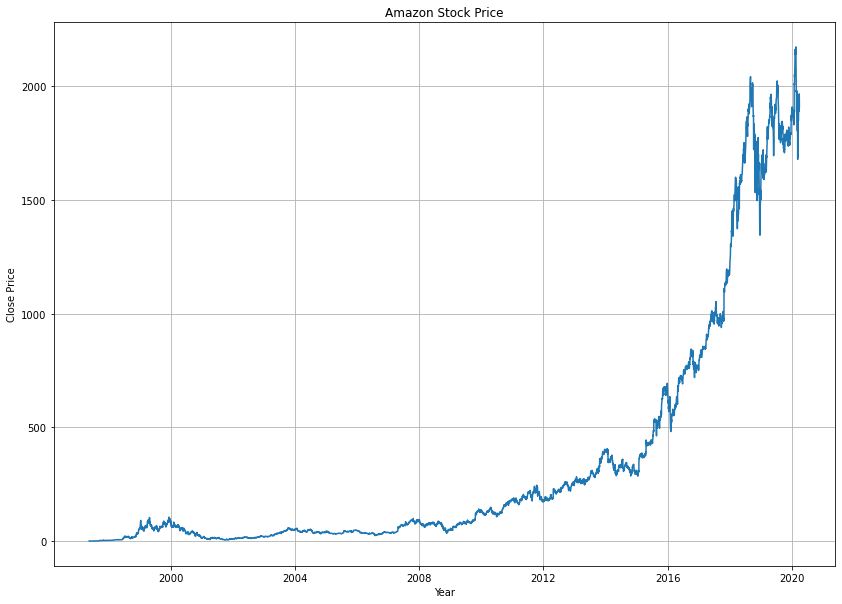

In [10]:
plt.figure(figsize=(14,10))
plt.plot(amzn['Close'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Amazon Stock Price')
plt.show()

In [11]:
amzn = amzn.loc[pd.Timestamp('2015-01-01'):pd.Timestamp('2019-12-31')]

In [12]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,4.059998
2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,4.820007
2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,6.949982
2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,-0.920013
2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400,-0.139984


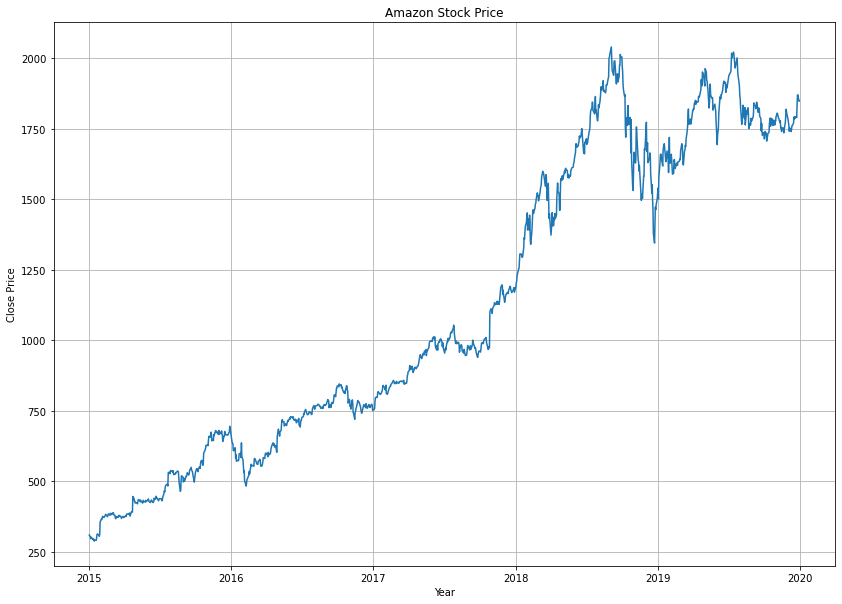

In [13]:
plt.figure(figsize=(14,10))
plt.plot(amzn['Close'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Amazon Stock Price')
plt.show()

In [14]:
daily_close = amzn[['Adj Close']]
daily_pct_c = daily_close.pct_change()
daily_pct_c.fillna(0, inplace=True)
print(daily_pct_c)

            Adj Close
Date                 
2015-01-02   0.000000
2015-01-05  -0.020517
2015-01-06  -0.022833
2015-01-07   0.010600
2015-01-08   0.006836
...               ...
2019-12-24  -0.002114
2019-12-26   0.044467
2019-12-27   0.000551
2019-12-30  -0.012253
2019-12-31   0.000514

[1258 rows x 1 columns]


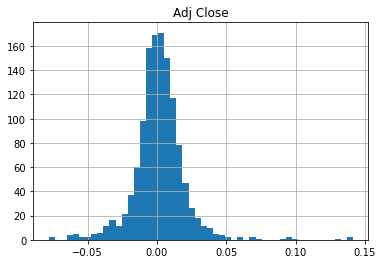

         Adj Close
count  1258.000000
mean      0.001591
std       0.018419
min      -0.078197
25%      -0.006546
50%       0.001303
75%       0.009932
max       0.141311


In [15]:
daily_pct_c.hist(bins=50)
plt.show()
print(daily_pct_c.describe())

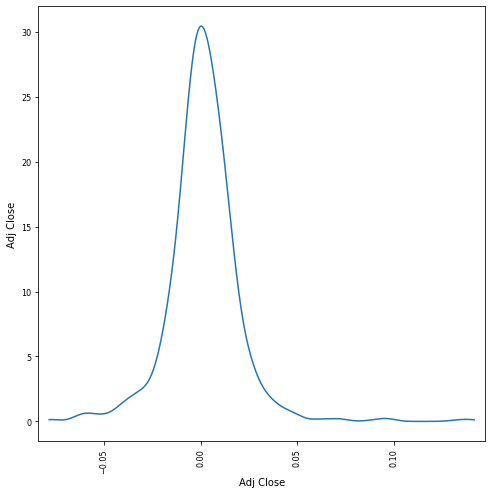

In [16]:
pd.plotting.scatter_matrix(daily_pct_c, diagonal='kde', alpha=0.1,figsize=(8,8))
plt.show()

# Moving Average
# In finance, a moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price. By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated.

# SMA vs EMA
# The exponential moving average gives more weight to recent prices in an attempt to make them more responsive to new information. To calculate an EMA, the simple moving average (SMA) over a particular period is calculated first.

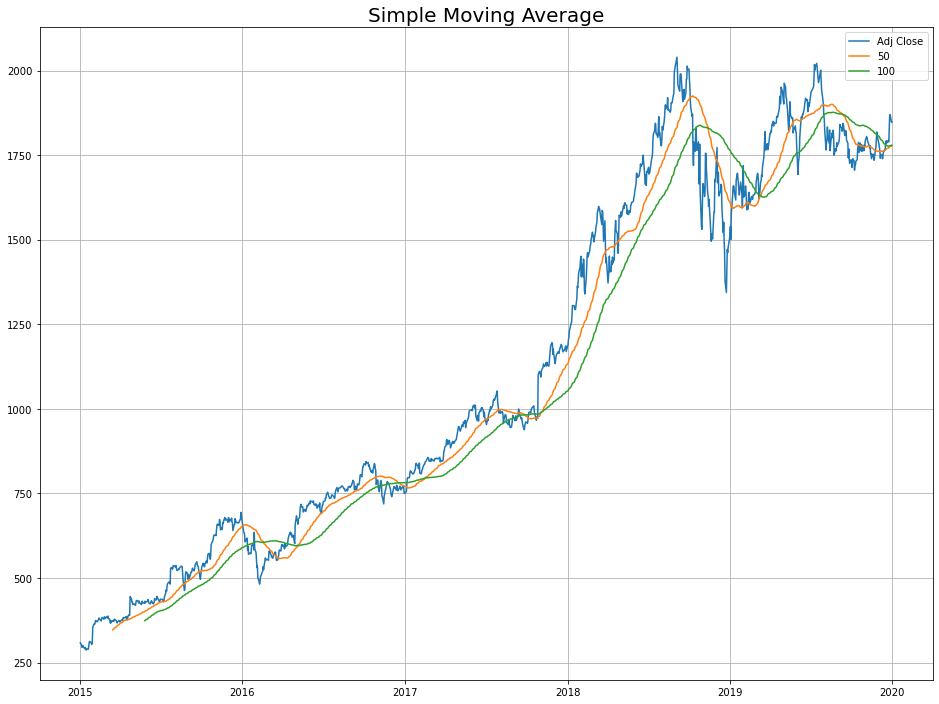

In [17]:
adj_close_px = amzn['Adj Close']
amzn['50'] = adj_close_px.rolling(window=50).mean()
amzn['100'] = adj_close_px.rolling(window=100).mean()

plt.figure(figsize=(16,12))
plt.plot(amzn['Adj Close'], label='Adj Close')
plt.plot(amzn['50'], label='50')
plt.plot(amzn['100'], label='100')
plt.title('Simple Moving Average', fontsize=20)
plt.grid()
plt.legend()
plt.show()

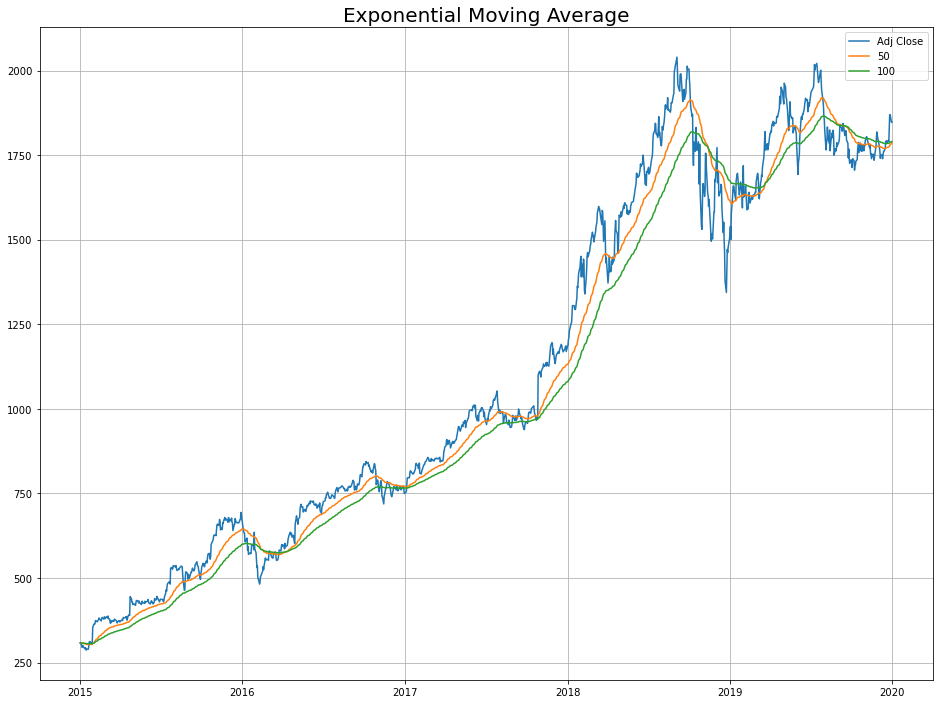

In [18]:
plt.figure(figsize=(16,12))
plt.plot(adj_close_px, label='Adj Close')
plt.plot(adj_close_px.ewm(span=50, adjust=False).mean(), label='50')
plt.plot(adj_close_px.ewm(span=100, adjust=False).mean(), label='100')
plt.title('Exponential Moving Average', fontsize=20)
plt.legend()
plt.grid()
plt.show()


# Volatility Calculation
# The volatility of a stock is a measurement of the change in variance in a stock's returns over a specific period. We can compare the volatilities of stocks to examine which are riskier.

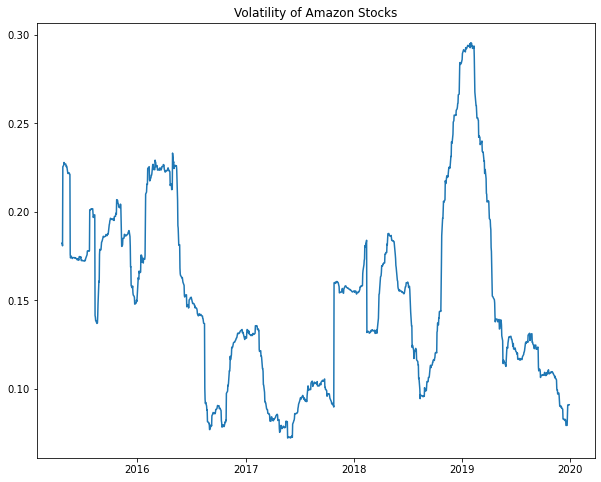

In [20]:
import numpy as np

min_periods = 75 
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 
plt.figure(figsize=(10, 8))
plt.plot(vol)
plt.title('Volatility of Amazon Stocks')
plt.show()

# Trading strategy
# Moving Average Crossover
# Among short- and long-term EMAs, they discovered that trading the crossovers of the 13-day and 48.5-day averages produced the largest returns. Buying the average 13/48.5-day “golden cross” produced an average 94-day 4.90 percent gain, better returns than any other combination.

In [21]:
short_window = 13
long_window = 49

signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0

signals['short_mavg'] = amzn['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = amzn['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

signals['positions'] = signals['signal'].diff()

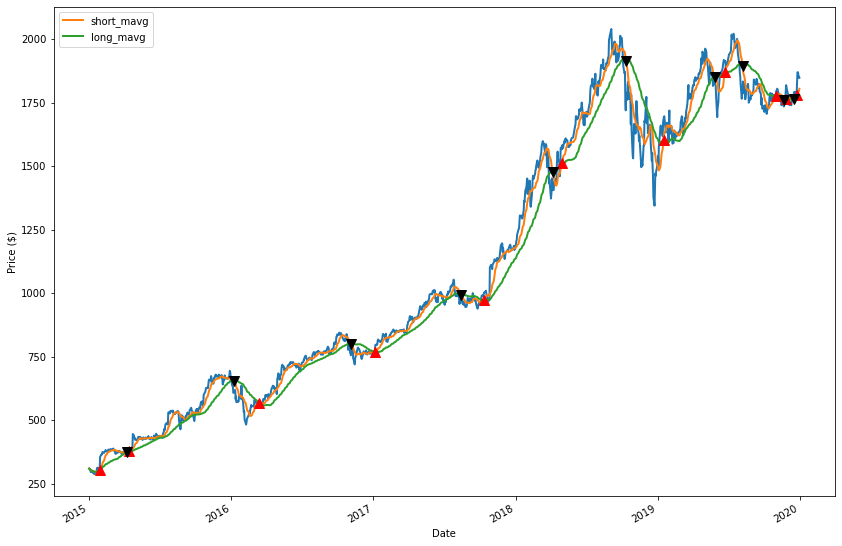

In [22]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111,  ylabel='Price ($)')
amzn['Close'].plot(ax=ax1, lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='red')
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='black')
plt.show()

# Backtesting
# Backtesting serves to calculate the performance of our strategy.

In [23]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['AMZN'] = 100*signals['signal']
portfolio = positions.multiply(amzn['Adj Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(amzn['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(amzn['Adj Close'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

In [24]:
portfolio.head()

,AMZN,holdings,cash,total,returns
Date,,,,,
2015-01-02,0.0,0.0,100000.0,100000.0,NaN
2015-01-05,0.0,0.0,100000.0,100000.0,0.0
2015-01-06,0.0,0.0,100000.0,100000.0,0.0
2015-01-07,0.0,0.0,100000.0,100000.0,0.0
2015-01-08,0.0,0.0,100000.0,100000.0,0.0


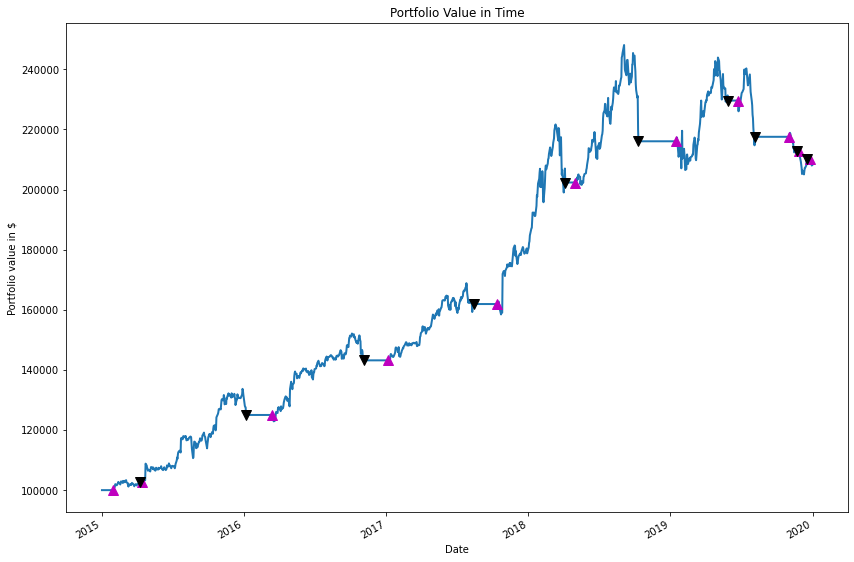

In [25]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.title('Portfolio Value in Time')
plt.show()